In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../dataset/')
from dataset import AsbestosDataSet
import os 
from pathlib import Path
from PIL import Image
import albumentations as A
import cv2

In [2]:
image_dir = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220'
mask_dir  = '../../task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/SegmentationAsbest'
dataset = AsbestosDataSet(image_dir, mask_dir)

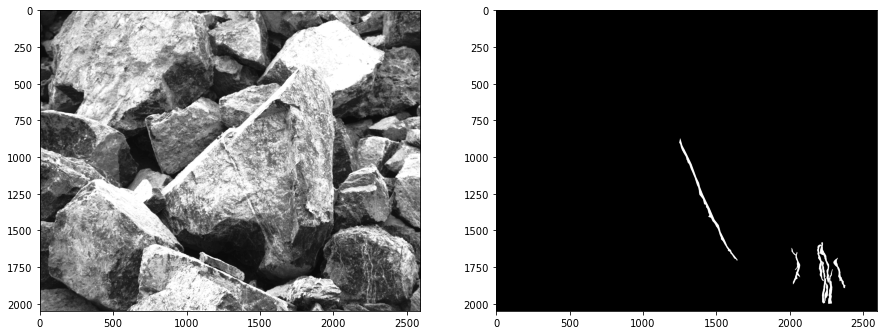

In [3]:
example = dataset[15]
image = example['image']
mask  = example['mask']

fig, ax = plt.subplots(1,2, figsize=(15,15), )
ax[0].imshow(image,cmap = 'Greys_r')
ax[1].imshow(mask, cmap = 'Greys_r')

In [27]:
t_h = 711
transform = A.Compose([A.RandomCrop(width=512*3, height=512*3), A.Resize(t_h,t_h), A.RandomRotate90()])

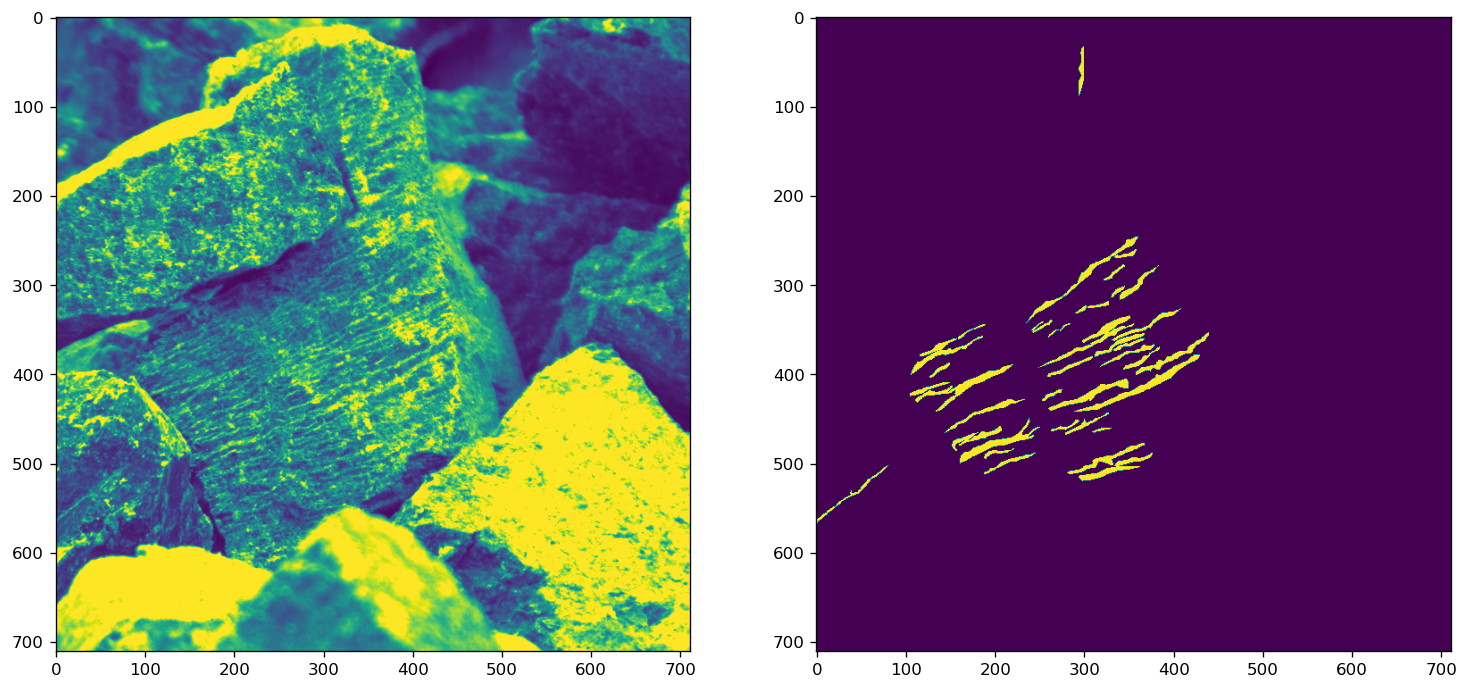

In [28]:
for i in range(2):
    example = dataset[i]
    image = example['image']
    mask  = example['mask']
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), dpi = 120 )
ax[0].imshow(transformed_image)
ax[1].imshow(transformed_mask)

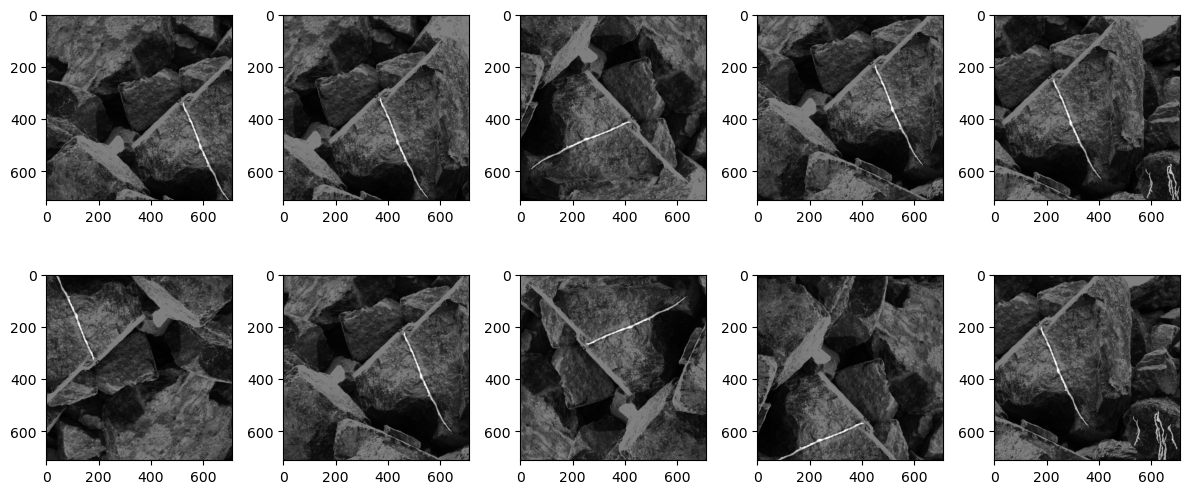

In [33]:
image = example['image']
mask  = example['mask']
fig, axis = plt.subplots(2,5, dpi = 100, figsize=(12,6))
j = 0
for i in range(10):
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    if i < 5:
        axis[0,i].imshow(transformed_image,cmap='gray',)
        axis[0,i].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    else:
        axis[1,i-5].imshow(transformed_image,cmap='gray',)
        axis[1,i-5].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    j+=1
    fig.tight_layout()

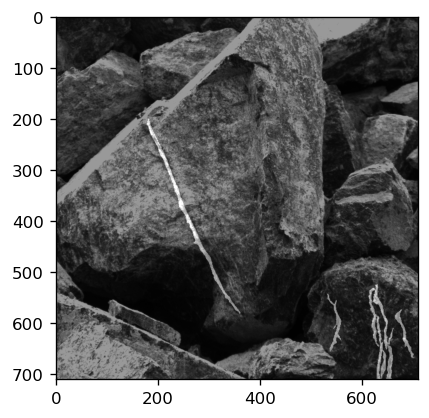

In [37]:
fig = plt.figure(dpi = 120)

plt.imshow(transformed_image, cmap='gray')
plt.imshow(transformed_mask, alpha = 0.4, cmap='gray',)

In [35]:
trans_set = AsbestosDataSet(image_dir, mask_dir, transform)

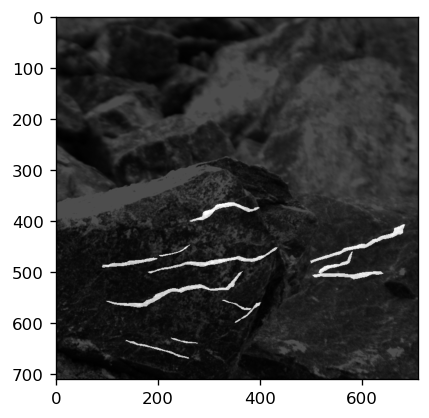

In [36]:
t = trans_set[26]
fig = plt.figure(dpi = 120)
plt.imshow(t['image'], cmap='gray')
plt.imshow(t['mask'], alpha = 0.7, cmap='gray',)

In [4]:
image_dir = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera/'
mask_dir  = '../../task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/SegmentationAsbest'
dataset = AsbestosDataSet(image_dir, mask_dir)

Number of images and masks are different


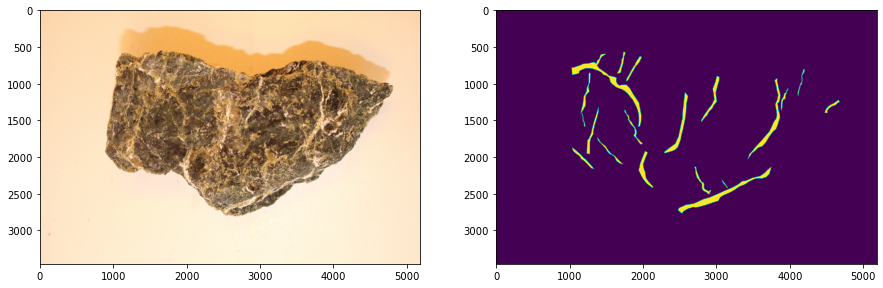

In [5]:
example = dataset[32]
image = example['image']
mask  = example['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), )
ax[0].imshow(image,cmap = 'Greys_r')
ax[1].imshow(mask)

In [6]:
import gc
gc.collect()

23

In [7]:
np.array(image.shape)//3

array([1152, 1728,    1])

In [8]:
transform = A.Compose([A.RandomCrop(1024,1024), A.RandomRotate90()])
transform = A.Compose([A.Resize(1152, 1728), A.RandomCrop(1024,1024), A.Resize(512,512) ,A.RandomRotate90()])
# transform = A.Compose([A.Resize(1728,2592), A.RandomCrop(640,640), A.RandomRotate90()])

IMG_2716.png
(512, 512, 4)


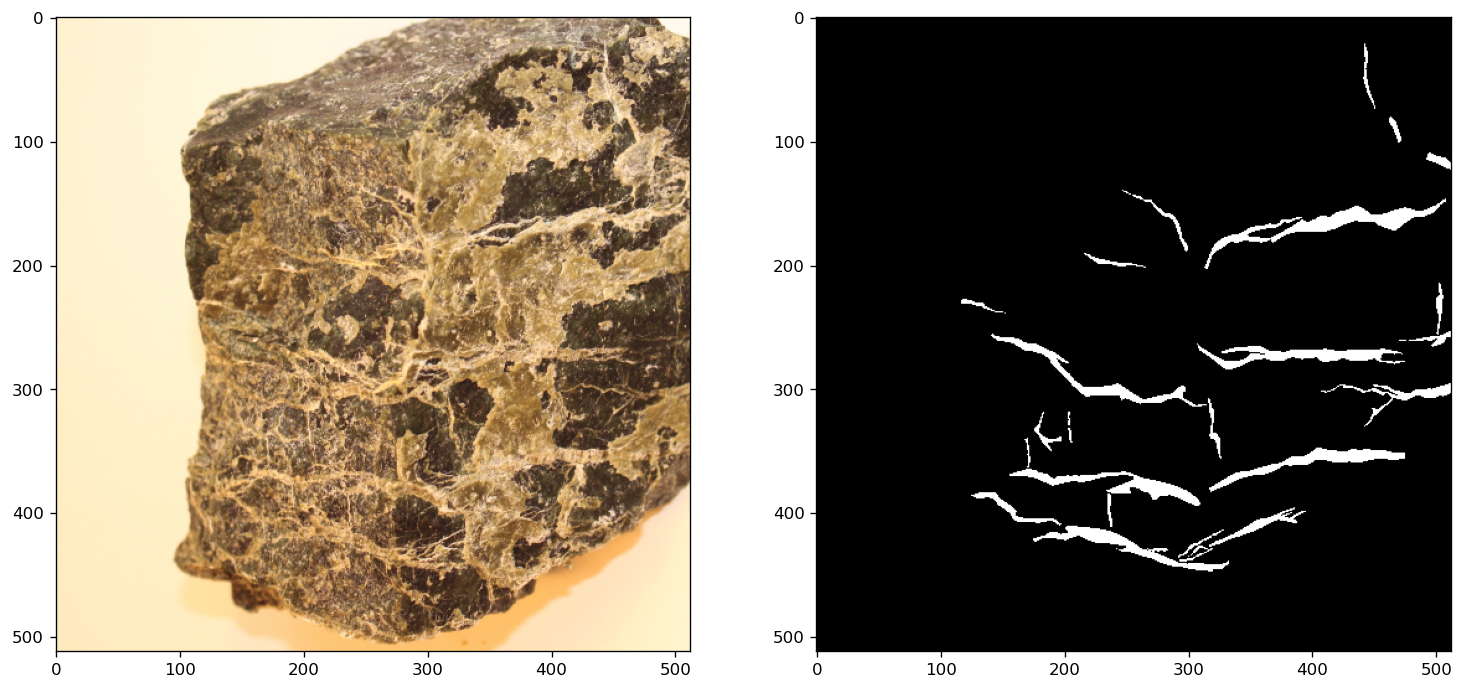

In [9]:
example = dataset[23]
image = example['image']
mask  = example['mask']
print(example['path'])
transformed = transform(image=np.array(image), mask=np.array(mask))
transformed_image = transformed['image']
transformed_mask = transformed['mask']
fig, ax = plt.subplots(1,2, figsize=(15,15), dpi = 120 )
ax[0].imshow(transformed_image)
ax[1].imshow(transformed_mask, cmap = 'gray')
print(transformed_image.shape)

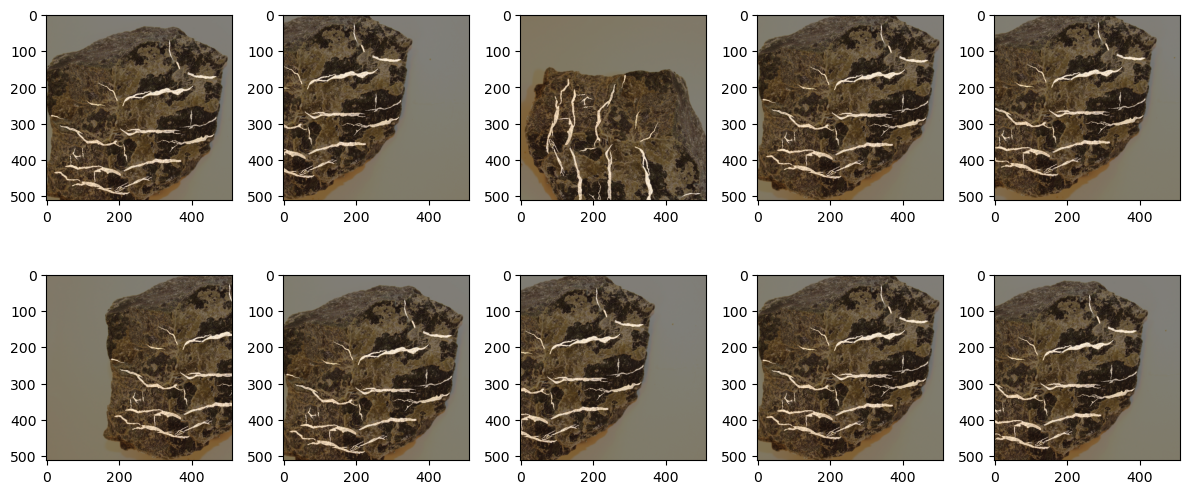

In [41]:
image = example['image']
mask  = example['mask']
fig, axis = plt.subplots(2,5, dpi = 100, figsize=(12,6))
j = 0
for i in range(10):
    transformed = transform(image=np.array(image), mask=np.array(mask))
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    if i < 5:
        axis[0,i].imshow(transformed_image,cmap='gray',)
        axis[0,i].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    else:
        axis[1,i-5].imshow(transformed_image,cmap='gray',)
        axis[1,i-5].imshow(transformed_mask, alpha = 0.5, cmap='gray',)
    j+=1
    fig.tight_layout()

In [12]:
img1 = Image.fromarray((255*image[:,:,:3]).astype(np.uint8)).convert('L')

In [15]:
np.array(img1).shape

(3456, 5184)

In [28]:
name = '/home/kirill/Учеба/asbestos/task_asbestos_stone_lab_common_camera-2021_12_10_13_12_14-mots png 1.0/images/asbestos/stones/lab_common_camera/IMG_2688.png'
name = '/home/kirill/Учеба/asbestos/task_asbestos_stone_161220-2021_01_13_12_39_03-segmentation mask 1.1 (1)/JPEGImages/asbestos/stones/161220/Full_637437067053998640.bmp'
image = Image.open(name).convert('L')

In [29]:
a = np.array(image)

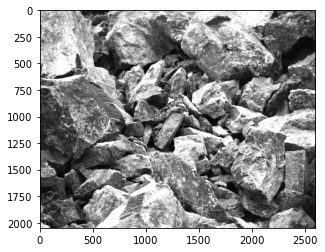

In [32]:
plt.imshow(a, cmap = 'gray')